In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd # 데이터 프레임
import numpy as np # 계산
import re # 정규표현식

import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

import seaborn as sns # 시각화
import graphviz # 시각화

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
#plt.rc('font', family='AppleGothic') # 맥
plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [4]:
# 컬럼이 모두 보이도록 설정

pd.options.display.max_columns = 32

In [5]:
df = pd.read_csv('C:/Users/chuu/Documents/GitHub/Learning_Spoons_Third_Project/data/preprocessed.csv',index_col=0)

In [6]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
df = df[df['adults']!=0]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
rh = pd.read_csv('C:/Users/chuu/Documents/GitHub/Learning_Spoons_Third_Project/data/Resort Hotel.csv')
rh.shape

(40047, 31)

In [9]:
ch = pd.read_csv('C:/Users/chuu/Documents/GitHub/Learning_Spoons_Third_Project/data/City Hotel.csv')
ch.shape

(78940, 31)

In [15]:
df[['stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel']].describe()

,stays_in_week_nights,adults,children,babies
count,118987.000000,118987.000000,118987.000000,118987.000000
mean,2.499046,1.862691,0.100431,0.007950
std,1.897763,0.570060,0.390216,0.097473
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,0.000000,0.000000
max,50.000000,55.000000,10.000000,10.000000


## Resort Hotel

In [16]:
# Resort Hotel 데이터 정보 확인
rh[['stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40047 entries, 0 to 40046
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stays_in_week_nights  40047 non-null  int64  
 1   adults                40047 non-null  int64  
 2   children              40047 non-null  float64
 3   babies                40047 non-null  int64  
 4   meal                  40047 non-null  object 
 5   country               40047 non-null  object 
 6   market_segment        40047 non-null  object 
 7   distribution_channel  40047 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.4+ MB


In [17]:
# Resort Hotel 기술통계량 확인
rh[['stays_in_week_nights','adults','children','babies']].describe()

# adults는 2명 고객이 가장 많은 것을 알 수 있다.
# children, babies는 0값이 75% 이상인 것을 알 수 있다.

,stays_in_week_nights,adults,children,babies
count,40047.000000,40047.000000,40047.000000,40047.000000
mean,3.128549,1.867755,0.128724,0.013909
std,2.461146,0.696587,0.445261,0.119017
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,50.000000,55.000000,10.000000,2.000000


In [22]:
rh['children'].value_counts()

0.0     36563
1.0      1838
2.0      1628
3.0        17
10.0        1
Name: children, dtype: int64

In [24]:
rh['babies'].value_counts()

# 0이 너무 많으므로 예측에 큰 영향을 주지 않을것이라 판단, 삭제한다.

0    39499
1      539
2        9
Name: babies, dtype: int64

In [187]:
# stays_in_week_nights','adults','children','babies'들은 어제 다영님이 하신게 더 나은것 같아서 제가 한 페어플롯이랑은 삭제했어요!

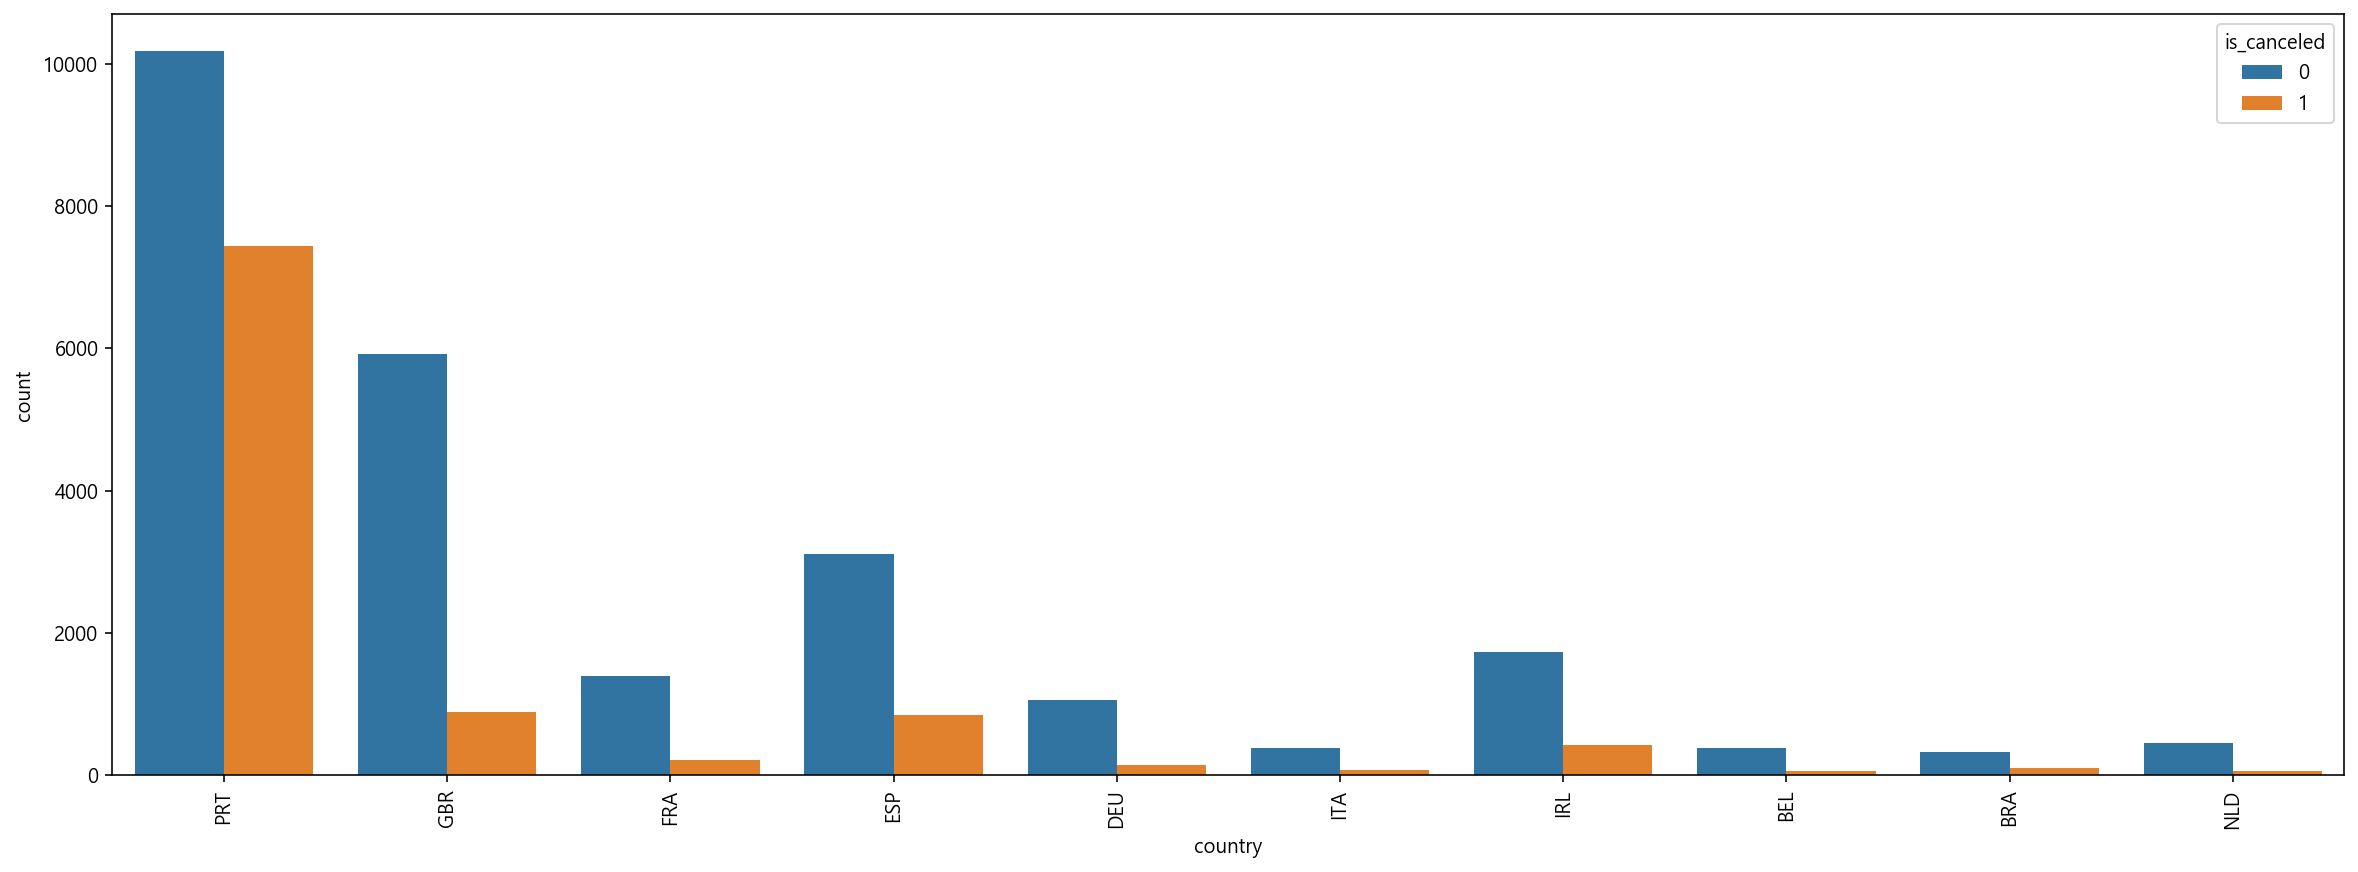

In [135]:
# country 나라별 취소 현황. 
# 포르투갈의 예약율이 가장 높고 취소율 또한 가장 높다. 자국 호텔이기 때문에 쉽게 예약과 취소를 하는 것으로 보인다.
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(data=rh, x = 'country', hue = 'is_canceled',order=df.country.value_counts(ascending=False).iloc[:10].index)

In [145]:
# 취소한 사람들의 meal type
rh_meal_index = rh['meal'].value_counts().index.tolist()
meal_rh = pd.DataFrame(rh['meal'][rh['is_canceled']==1].value_counts(), index = rh_meal_index)
meal_rh

,meal
BB,7843
HB,2547
Undefined,286
FB,443
SC,1


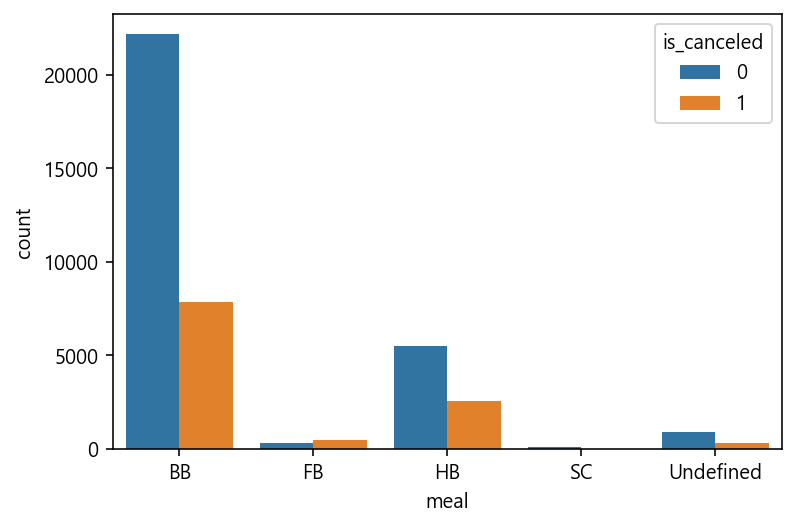

In [140]:
# resort hotel의 meal type에 따른 취소 현황 그래프
sns.countplot(data=rh, x = 'meal', hue = 'is_canceled')

In [141]:
# meal type에 따른 취소율
s=rh['meal']
t=rh['is_canceled']
mealtype = ['BB','SC','HB','FB','Undefined']
for i in mealtype:
        p = s[(s==i)&(t==1)].count()/s[s==i].count()
        print(i,p)
        
# resort hotel의 경우, FB를 제외한 식사 조건에 따른 취소율이 30% 내외로 비슷했다. (이 때, SC와 Undefined는 같은 조건으로 본다.)
# 아침 점심 저녁을 다 신청하는 FB의 경우 취소율이 60% 가까우며, 체크인 비율보다 높은 것을 알 수 있다.

BB 0.2614071926140719
SC 0.013333333333333334
HB 0.31655480984340045
FB 0.5875331564986738
Undefined 0.2446535500427716


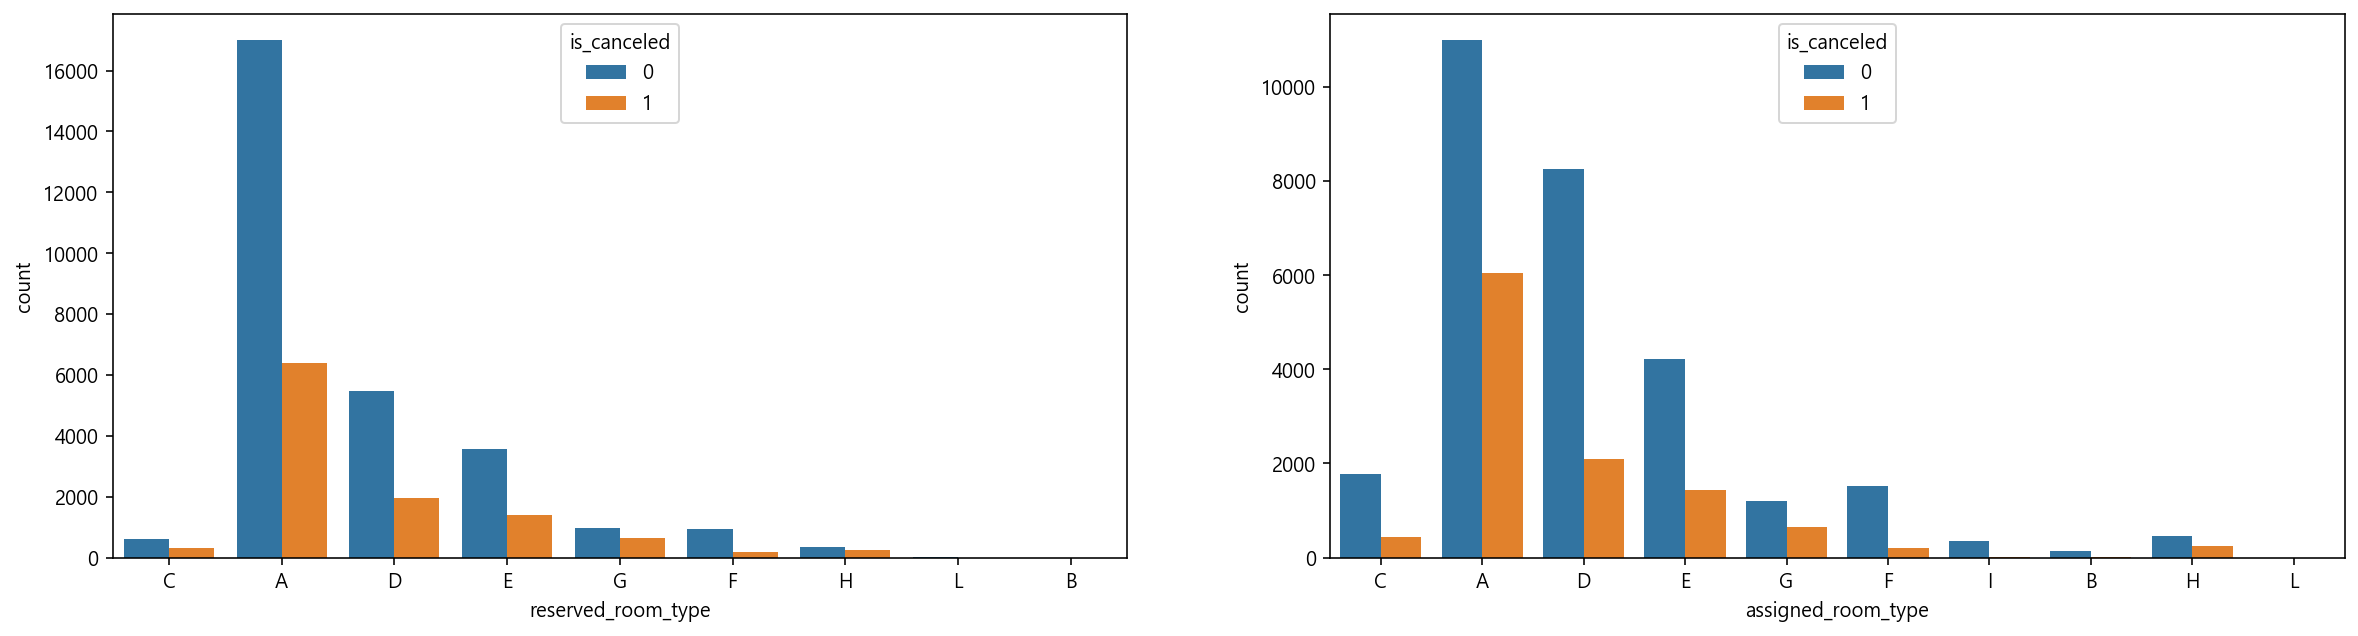

In [149]:
# room type에 따른 취소 현황 그래프
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5)) 
room_type = ['reserved_room_type','assigned_room_type']
for i, col_name in enumerate(room_type):
    col = i
    sns.countplot(data=rh, x = col_name, hue = 'is_canceled', ax = axes[i])
    

# reserved room과 assigned room 모두 A,D,E 순으로 예약이 가장 많은것을 알 수 있다. 

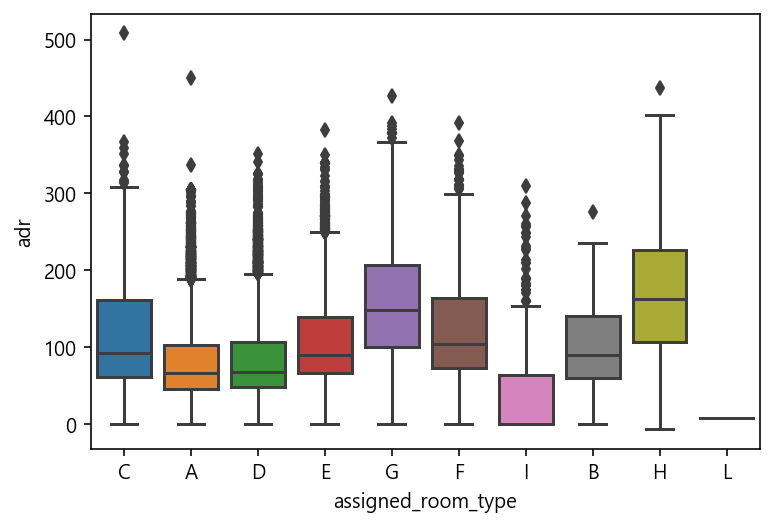

In [175]:
# room type 에 따른 adr 비교. adr은 실제 매출로 assigned room type을 기준으로 그린다.

sns.boxplot(data = rh, x = 'assigned_room_type',y = 'adr')

# assigned_room_type 그래프를 통해 예약이 가장 많은 A, D, E 순으로 가격이 낮을것으로 예상했었다.
# 실제로 A,D,E의 가격대가 낮기는 하지만 예약율이 낮은 비슷한 가격대의 다른 룸타입도 있는것을 알 수 있다.
# 가격만이 룸 타입 선택의 기준이 되는 것은 아닌 것으로 판단된다.

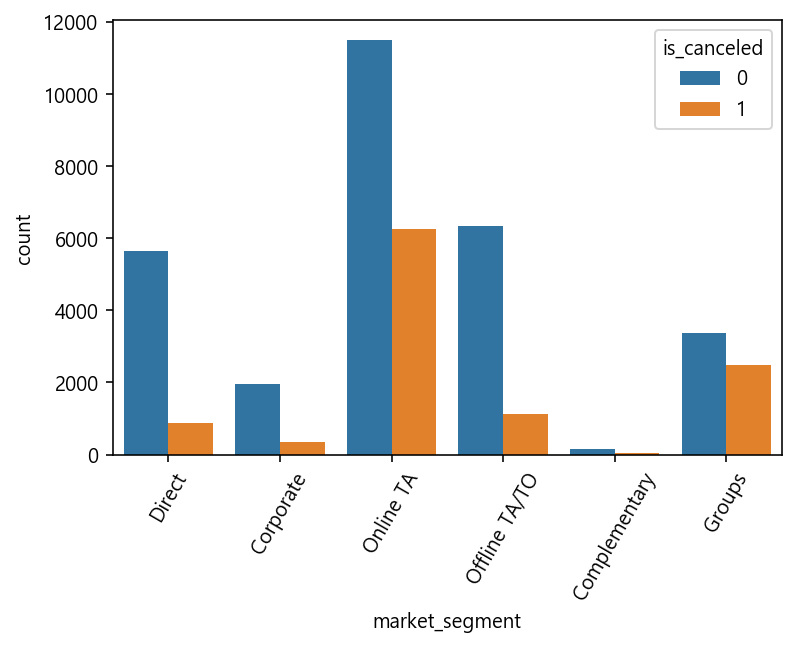

In [165]:
# market segment에 따른 취소 현황 그래프
plt.xticks(rotation = 60)
sns.countplot(data = rh, x = 'market_segment' ,hue = 'is_canceled')

# Online TA, Groups로 예약한 경우의 취소율이 상대적으로 높아보인다.

In [166]:
# 취소율 확인
y=rh['market_segment']
x=rh['is_canceled']
dc = ['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Groups']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# Complementary = 고객 이벤트룸. 무료.
# 대부분 15% 내외이나 Online TA는 35%, Groups예약의 취소율은 42%로 높은 취소율을 보인다.
# Online 예약의 경우 취소가 좀 더 쉽고, 
# 그룹예약은 한 번 취소하면 여러개가 한번에 취소되기 때문에 높은 취소율을 나타낸 것으로 판단된다.ㅣ

Direct 0.1348694316436252
Corporate 0.15227765726681128
Online TA 0.3524169439900728
Offline TA/TO 0.15207496653279787
Complementary 0.16417910447761194
Groups 0.42421124828532236


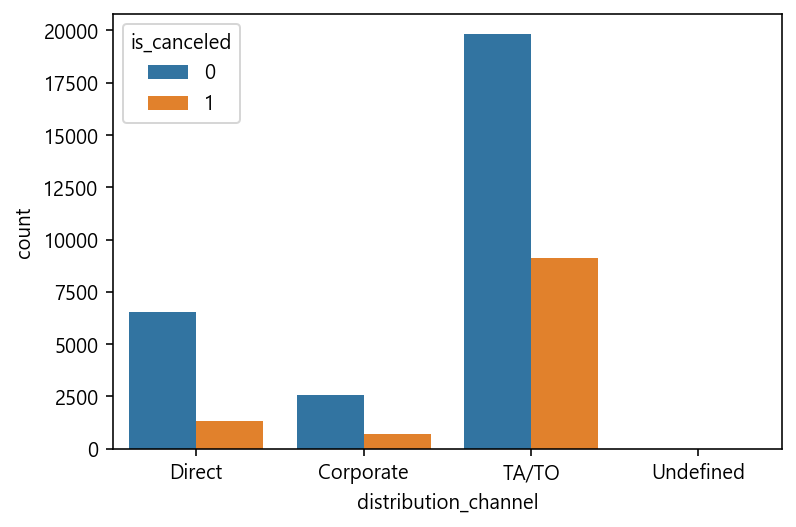

In [162]:
# distribution_channel에 따른 취소 현황 그래프
sns.countplot(data = rh, x = 'distribution_channel' ,hue = 'is_canceled')

In [163]:
# 취소율 확인
y=rh['distribution_channel']
x=rh['is_canceled']
dc = ['TA/TO','Direct','Undefined','Corporate','GDS']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# 비율을 살펴보면, 다른 채널을 통해 예약한 고객들의 취소율은 20% 내외이지만, TA/TO를 통해 예약한 고객의 취소율은 45%에 달한다.
# Undefined의 경우 값이 없어서 1로 나옴
# 여러 호텔을 비교할 수 있는 사이트를 통해 예약한 고객들은 취소 후 다른 좋은 조건의 호텔로 예약할 수 있다고 판단된다.

TA/TO 0.31491407033438223
Direct 0.16853218010684304
Undefined 0.0
Corporate 0.2107197549770291
GDS nan


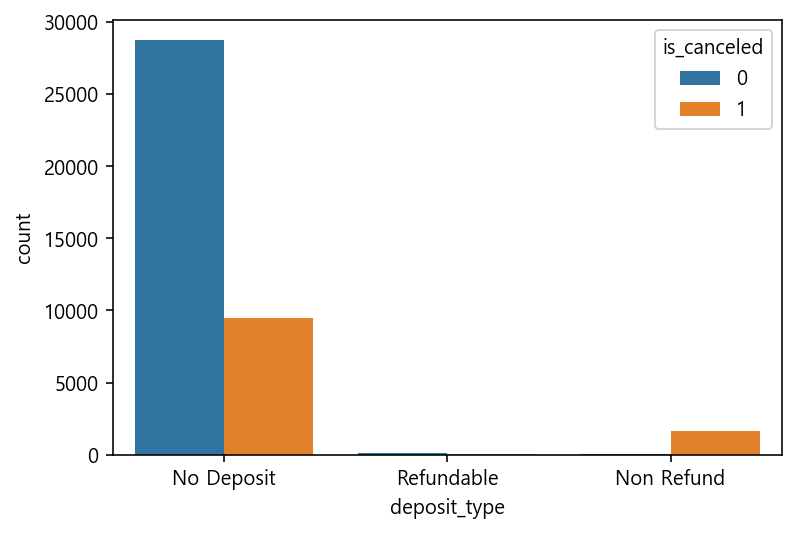

In [164]:
# deposit_type에 따른 취소 현황 그래프
sns.countplot(data = rh, x = 'deposit_type' ,hue = 'is_canceled')

# deposit_type 컬럼의 경우 Non Refund 조건이지만 취소된 경우가 있는데,
# 예약자의 사정으로 못 오게 된 경우와 실수로 예약을 눌러 취소를 못 한 경우가 있을 수 있다.
# 환불 불가 조건인데 취소가 되었다는 부분에서 모순으로 보일 수 있지만,
# 해당 데이터에는 노쇼 고객은 따로 표시되지 않고 체크인한 고객과 취소한 고객으로만 나뉘어져 있기 때문에
# 고객이 오지 않은 경우도 취소된 예약으로 표시된 것으로 보인다.
# 또 예약 고객들이 온라인으로 예약을 했기 때문에 환불은 안되었는데 취소는 되었을 수 있다.

## City Hotel

In [142]:
# City Hotel 데이터 정보 확인
ch[['stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78940 entries, 0 to 78939
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stays_in_week_nights  78940 non-null  int64  
 1   adults                78940 non-null  int64  
 2   children              78940 non-null  float64
 3   babies                78940 non-null  int64  
 4   meal                  78940 non-null  object 
 5   country               78940 non-null  object 
 6   market_segment        78940 non-null  object 
 7   distribution_channel  78940 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.8+ MB


In [11]:
# City Hotel 기술통계량 확인
ch[['stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel']].describe()

,stays_in_week_nights,adults,children,babies
count,78940.000000,78940.000000,78940.000000,78940.000000
mean,2.179693,1.860122,0.086078,0.004928
std,1.432733,0.493609,0.358229,0.084308
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,0.000000,0.000000
max,34.000000,4.000000,3.000000,10.000000


In [57]:
ch['adults'].value_counts()

2    58255
1    15879
3     4775
4       31
Name: adults, dtype: int64

In [58]:
ch['children'].value_counts()

0.0    74057
1.0     3019
2.0     1816
3.0       48
Name: children, dtype: int64

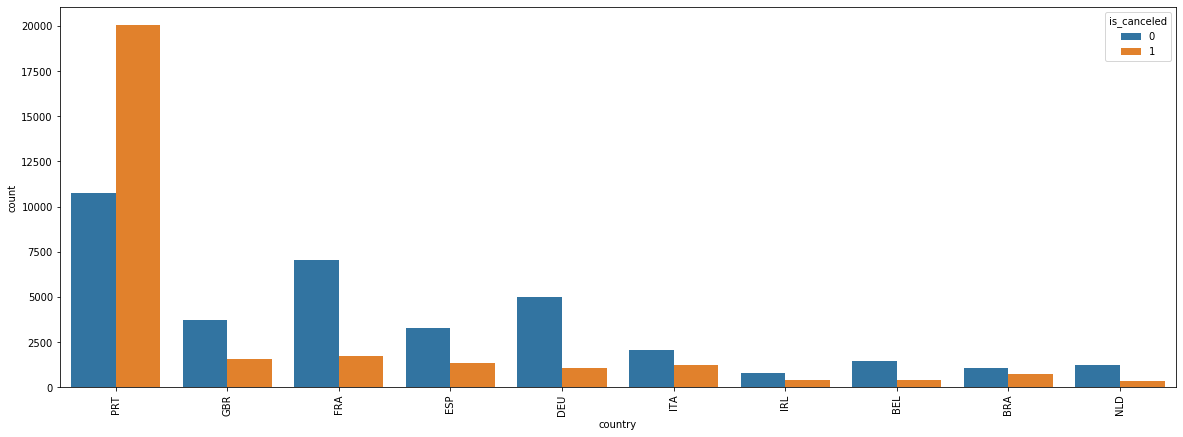

In [81]:
# 나라별 취소 현황 그래프
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(data=ch, x = 'country', hue = 'is_canceled',order=df.country.value_counts(ascending=False).iloc[:10].index)

# city hotel의 경우, 호텔이 위치한 포르투갈 국적 예약자들의 취소율이 체크인 비율보다 높은것을 볼 수 있다.
# 계산해보면 포르투갈인들의 호텔 취소율이 65%에 달하는 것을 알 수 있다. 
# 자국 호텔이기 때문에 예약과 취소를 쉽게 하는 것으로 판단된다.

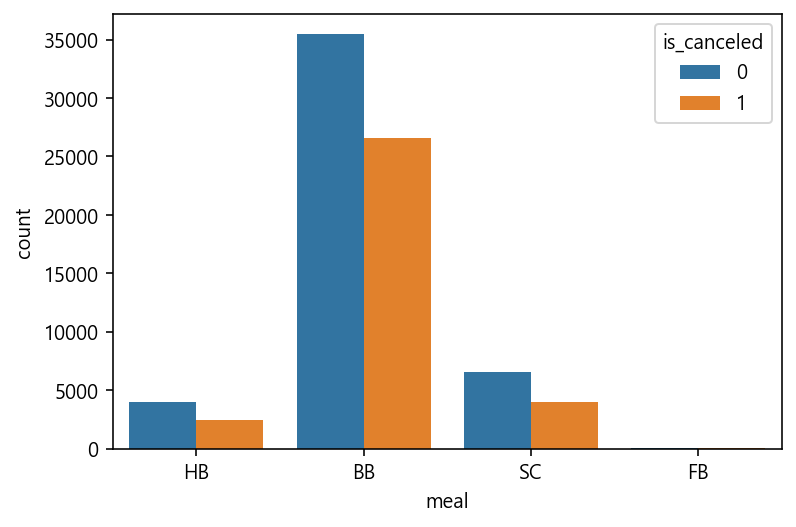

In [27]:
# city hotel의 meal type에 따른 취소 현황 그래프
sns.countplot(data=ch, x = 'meal', hue = 'is_canceled')
# 조식을 선택한 비율이 가장 높아 보이고 취소율은 비슷해보인다. FB의 경우 그래프로 판단할 수 없다.

In [139]:
# meal type에 따른 취소율
y=ch['meal']
x=ch['is_canceled']
mealtype = ['BB','SC','HB','FB']
for i in mealtype:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# 식사 조건에 따른 취소율을 비교해 본 결과, 아침, 점심, 저녁을 다 주문하는 FB 조건의 경우 취소율이 80%에 가까웠다.
# 다른 조건의 경우 취소율이 40% 내외로 서로 큰 차이를 보이지 않았다.
# resort hotel과 마찬가지로 FB의 취소율이 체크인 비율보다 높은 것을 알 수 있다.

BB 0.42857603560314106
SC 0.37675484671951104
HB 0.3801498127340824
FB 0.7954545454545454


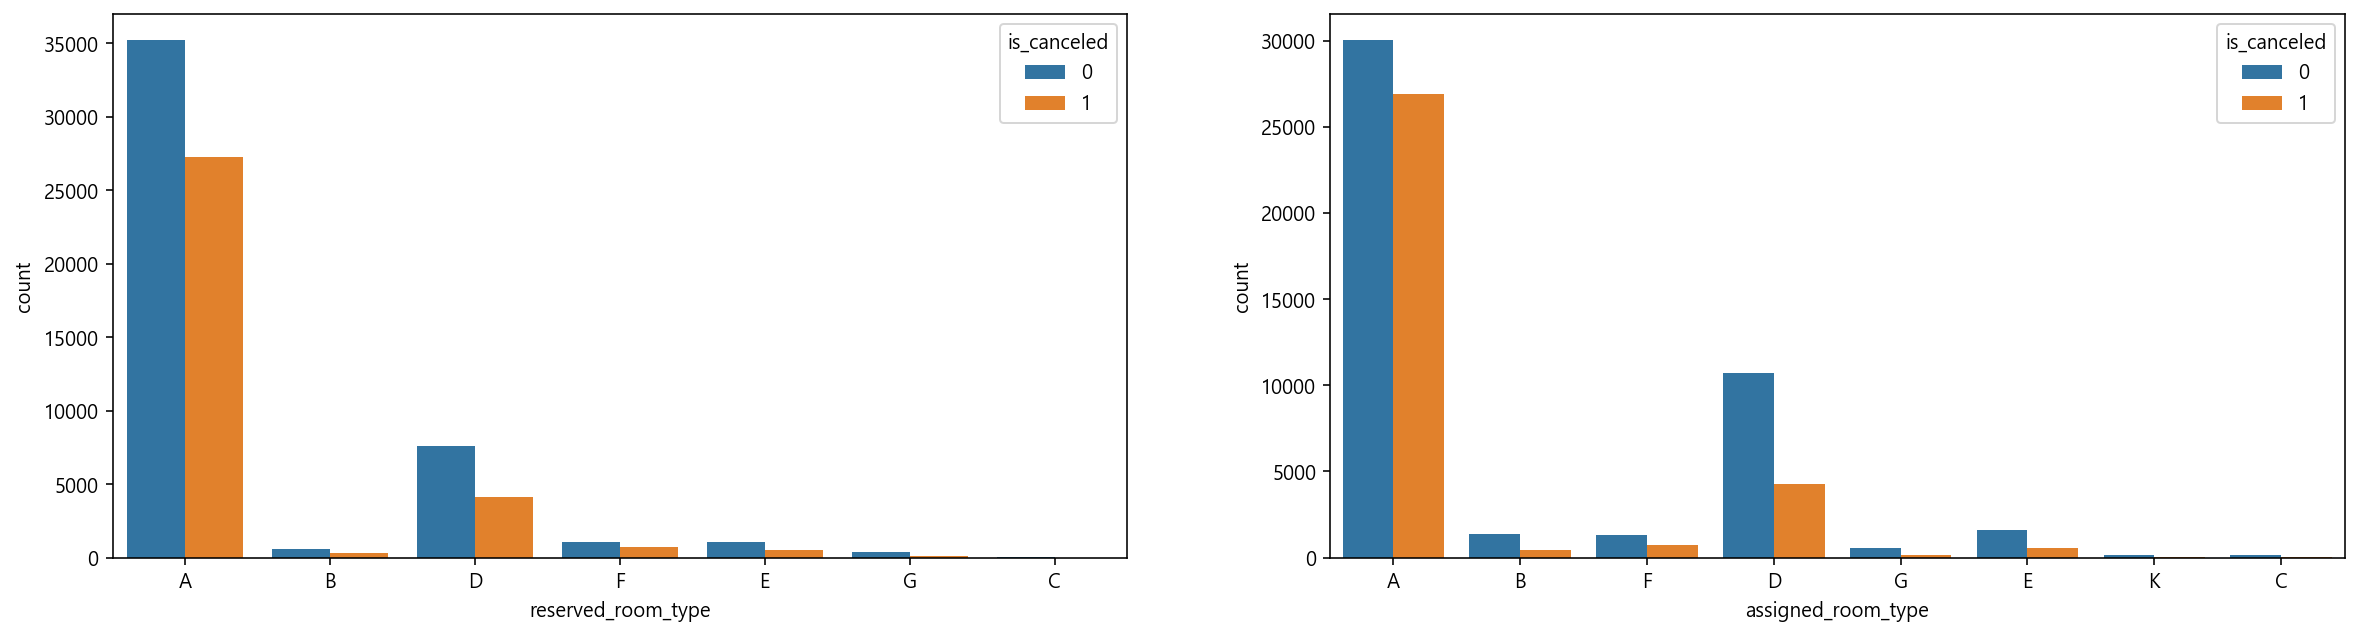

In [148]:
# room type에 따른 취소 현황
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5)) 
room_type = ['reserved_room_type','assigned_room_type']
for i, col_name in enumerate(room_type):
    col = i
    sns.countplot(data=ch, x = col_name, hue = 'is_canceled', ax = axes[i])
    
# A, D 룸의 예약율 및 취소율이 월등히 높으며, 이 두 룸이 가장 싼 기본 룸으로 판단된다.

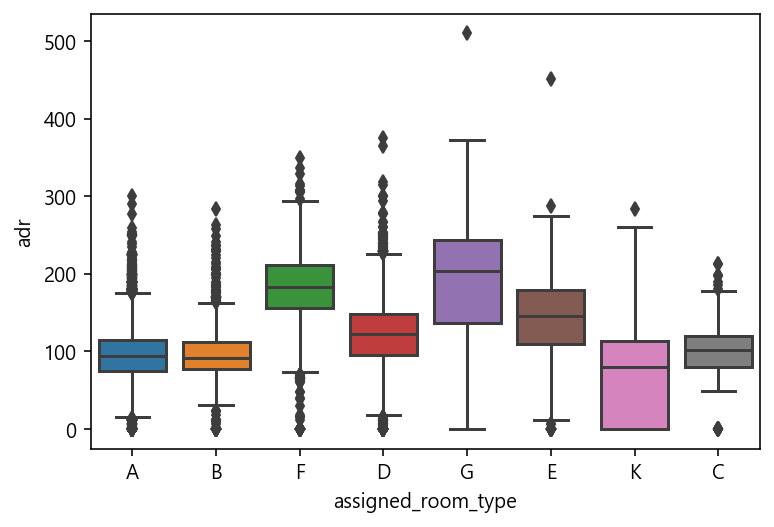

In [186]:
# room type 에 따른 adr 비교. adr은 실제 매출로 assigned room type을 기준으로 그린다. adr이 5400인 행은 이상치로 판단, 삭제함.

sns.boxplot(data = ch, x = 'assigned_room_type',y = 'adr')

# 예약이 가장 많은 A, D room type의 가격이 가장 낮을것으로 예상했다. 
# A, D의 가격이 전체적으로 낮기는 하지만, 비슷한 가격대의 룸의 예약율과 크게 차이나는 것으로 보아, 
# 가격 외에도 룸 타입을 선택하는 기준이 있는 것으로 판단된다.

In [185]:
# adr 5400이상인것 제외
print(ch.shape)
ch = ch[ch['adr']<1000]
ch.shape

(78940, 31)


(78939, 31)

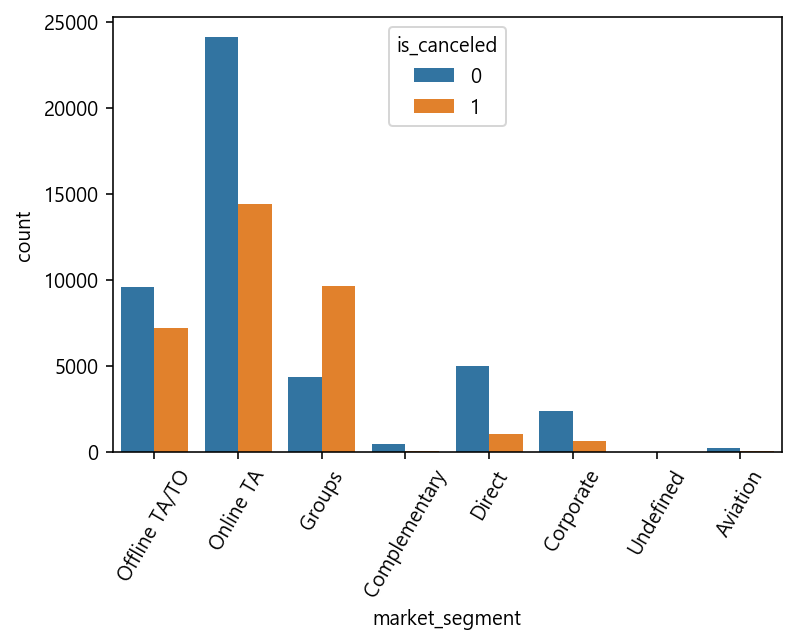

In [152]:
# market segment에 따른 취소 현황 그래프
plt.xticks(rotation=60)
sns.countplot(data = ch, x = 'market_segment' ,hue = 'is_canceled')
# 온라인, 오프라인 TA/TO를 통한 예약이 많다는 것을 알 수 있다.
# Groups의 경우 취소율이 체크인율보다 높아 단체 고객들의 대량 취소가 있었던 것을 알 수 있다.

In [168]:
# market_segment에 따른 취소율 확인
y=ch['market_segment']
x=ch['is_canceled']
dc = ['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Aviation','Undefined','Groups']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# Complementary = 고객 이벤트룸. 무료. Aviation = 항공사
# City Hotel의 경우 리조트 호텔에 비해 offline TA/TO 취소율도 높은 것을 알 수 있다.
# Groups의 경우 취소율이 70%에 육박한다.
# 다른 조건의 경우 취소율이 20% 이내로 높지 않다.

Direct 0.17358927684924708
Corporate 0.21498152502519316
Online TA 0.37441546295334094
Offline TA/TO 0.42881082051588965
Complementary 0.10516252390057361
Aviation 0.22127659574468084
Undefined 1.0
Groups 0.6891611146930295


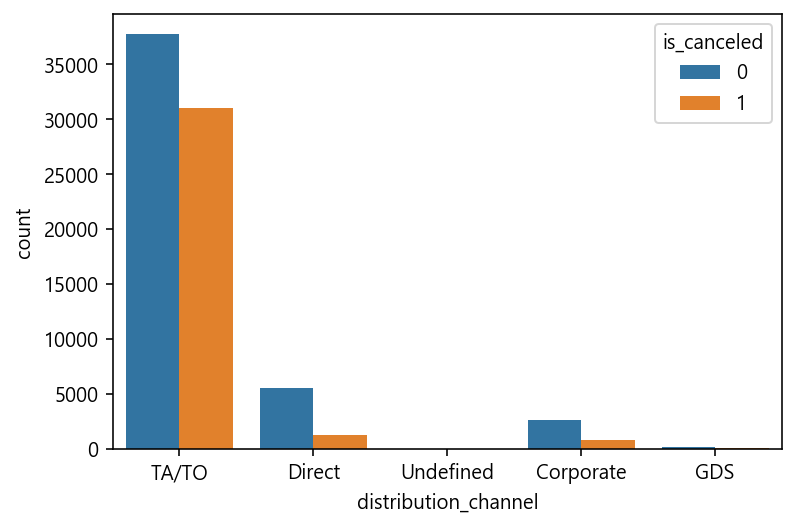

In [77]:
# distribution_channel에 따른 취소 현황 그래프
sns.countplot(data = ch, x = 'distribution_channel' ,hue = 'is_canceled')
# city hotel의 경우 TA/TO를 통해 예약한 고객들의 취소율이 월등히 높았다.

In [161]:
ch['distribution_channel'][(ch['distribution_channel']=='Undefiend')&(ch['is_canceled']==1)].count()
# Undefined 조건은 값이 없음.

0

In [154]:
# distribution_channel에 따른 취소율 확인
y=ch['distribution_channel']
x=ch['is_canceled']
dc = ['TA/TO','Direct','Undefined','Corporate','GDS']
for i in dc:
        p = y[(y==i)&(x==1)].count()/y[y==i].count()
        print(i,p)

# 취소율을 살펴보면, 다른 채널을 통해 예약한 고객들의 취소율은 20% 내외이지만, TA/TO를 통해 예약한 고객의 취소율은 45%에 달한다.
# Undefined의 경우 값이 없어서 1로 나옴
# 여러 호텔을 비교할 수 있는 사이트를 통해 예약한 고객들은 취소 후 다른 좋은 조건의 호텔로 예약할 수 있다고 판단된다.

TA/TO 0.4509404000524468
Direct 0.18195354377605719
Undefined 1.0
Corporate 0.23006497341996457
GDS 0.19170984455958548


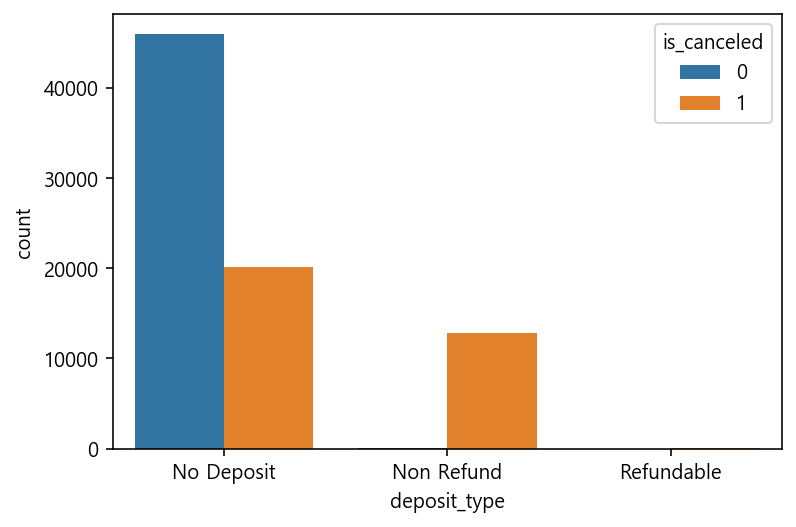

In [169]:
# deposit_type에 따른 취소 현황 그래프
sns.countplot(data = ch, x = 'deposit_type' ,hue = 'is_canceled')

# resort hotel과 마찬가지.
# deposit_type 컬럼의 경우 Non Refund 조건이지만 취소된 경우가 있는데,
# 예약자의 사정으로 못 오게 된 경우와 실수로 예약을 눌러 취소를 못 한 경우가 있을 수 있다.
# 환불 불가 조건인데 취소가 되었다는 부분에서 모순으로 보일 수 있지만,
# 해당 데이터에는 노쇼 고객은 따로 표시되지 않고 체크인한 고객과 취소한 고객으로만 나뉘어져 있기 때문에
# 고객이 오지 않은 경우도 취소된 예약으로 표시된 것으로 보인다.
# 또 예약 고객들이 온라인으로 예약을 했기 때문에 환불은 안되었는데 취소는 되었을 수 있다.